# Simple neural network classification example using pytorch

This notebook illustrates on a simple example how to use pytorch to implement a neural network that performs a binary classification 

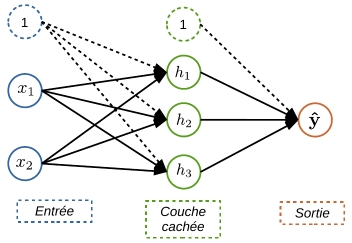


We first add the pytorch packages required for our example

### Imports python

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
%matplotlib inline

#Import pytorch:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

## 1. Data loading and visualization

We start by loading our data, which are of dimension 2, and of 2 different classes. We first select the dataset `moon`. We can select another dataset here later.

[-0.09072099  0.16760617] 1
[0.49605956 1.06894324] 0
[ 1.89925478 -0.28099241] 1
[0.06401337 0.12047115] 1
[0.88203954 0.48150274] 0
[0.49860543 0.8342023 ] 0
[-1.07622817  0.24465913] 0
[0.96427842 0.58161776] 0
[-0.11230612  1.04315216] 0
[0.06202564 0.86546765] 0


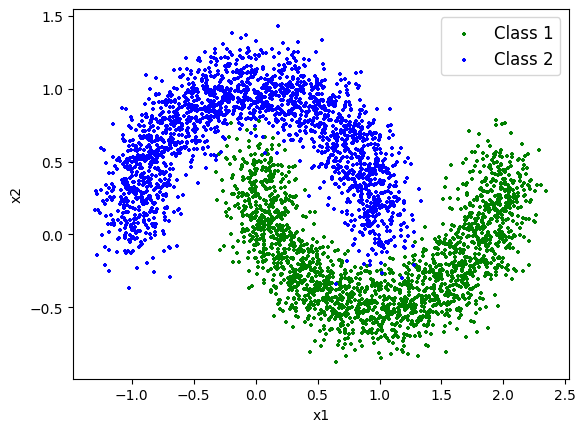

In [2]:
#Nomber of samples
N_samples = 4000

#Choose dataset here!
#Dataset moon
features, labels = datasets.make_moons(n_samples=N_samples, noise=.15,random_state=0)
#Dataset blobs
#features, labels = datasets.make_blobs(n_samples=N_samples, cluster_std=0.3, centers=[(-0.1, -0.2), (1.2, 1.4)], n_features=2, random_state=0)
#Dataset circles
#features, labels= datasets.make_circles(n_samples=N_samples, shuffle=True, noise=0.1, factor=0.3,random_state=0)

# Display the first 10 samples and there labels
for i in range(10):
    print(features[i,:], labels[i])

# Data visualization
pos = plt.scatter(features[0:N_samples:, 0][labels==1], features[0:N_samples, 1][labels==1], c='g', marker = '+', s=10, label='Class 1')
neg = plt.scatter(features[0:N_samples:, 0][labels==0], features[0:N_samples, 1][labels==0], c='b', marker = '+', s=10, label='Class 2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper right',fontsize=12)
plt.show()

## 2. Split dataset into training and test set

We split our data into 1 training set and 1 test set

In [3]:
# features : [x1, x2]
# Pourcent of training samples
ratio_train_test = 0.75
N_train = int(ratio_train_test*N_samples)


# split train and test :
# Train dataset
features_train = features[0:N_train,:]
labels_train = labels[0:N_train].reshape(-1,1)
# Test dataset
features_test = features[N_train:N_samples,:]
labels_test = labels[N_train:].reshape(-1,1)

### Conversion of data into pytorch tensors

Here we convert the data into the pytorch tensor format to be able to use them with the pytorch functions later, and we build the pytorch dataset:

In [4]:
X_train_t = torch.from_numpy(features_train).type(torch.FloatTensor)
Y_train_t = torch.from_numpy(labels_train).type(torch.FloatTensor)
train_data = TensorDataset(X_train_t, Y_train_t)
print('Training dataset: ', train_data)

X_test_t = torch.from_numpy(features_test).type(torch.FloatTensor)
Y_test_t = torch.from_numpy(labels_test).type(torch.FloatTensor)
test_data = TensorDataset(X_test_t, Y_test_t)
print('Testing dataset: ', test_data)

Training dataset:  <torch.utils.data.dataset.TensorDataset object at 0x000001E16CEBDDD0>
Testing dataset:  <torch.utils.data.dataset.TensorDataset object at 0x000001E16B100410>


## 4. Model construction



### Model and predictions

We define our neural network in a specific class here. The function `forward`  performs our forward propagation, to obtain the probabilities (between $0$ and $1$). The `predict` function computes the predicted labels: for this it first computes the predicted probabilities using the `forward` function and then rounds to the nearest integer to obtain $=0$ or $=1$.

In [5]:
# Hyperparameters
# Choose here the number of neurons of the hidden layer:
H = 10 # 10 works well, but you can play around with it

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(2, H),
            nn.Sigmoid(),
            nn.Linear(H, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.fc(x)
        return x
    
    def predict(self, x):        
        outputs = self.forward(x)  
        return np.round(outputs.detach().numpy()[:,0])


# To make random draws reproducible (optional)   
torch.manual_seed(0)

# Network creation
model = Net()

# Display
print(model)

Net(
  (fc): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=10, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


## 5. Training

### Training preparation


In [6]:
# Hyperparameters
N_epochs = 1000
batch_size = 300    # 100-300 work reasonably well, but you can play around with it
learning_rate = 1   # 1 works well, but you can play around with it

#### Cost function
https://pytorch.org/docs/master/nn.html#loss-functions

In [7]:
loss_function = nn.BCELoss(reduction ='mean') # Binary Cross Entropy
#loss_function = nn.MSELoss()                  # Mean Square Error

#### Optimizer
https://pytorch.org/docs/master/optim.html#algorithms

In [8]:
optimizer = optim.SGD(model.parameters(), lr=learning_rate)  # SGD
#optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4) # ADAM

In [9]:
# Data loading tool
train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

### Network training


In [ ]:
losses = []   
for epoch in range(N_epochs):  # Loop on epochs 
    for features, labels in train_dataloader:
        #Forward Propagation
        labels_pred = model(features) # 
        
        #Loss computation
        loss = loss_function(labels_pred,labels)

        #Save loss for later display
        losses.append(loss.item())

        #reset gradient values
        optimizer.zero_grad()

        #Compute gradient by backpropagation
        loss.backward()

        #Optimizer step
        optimizer.step()
        
    if epoch % 100 == 99:
            print('Epoch',epoch, 'loss', loss.item())
    
print('Training done')

Epoch 99 loss 0.008864142931997776
Epoch 199 loss 0.02174328826367855
Epoch 299 loss 0.01937601901590824
Epoch 399 loss 0.014754651114344597
Epoch 499 loss 0.009689298458397388
Epoch 599 loss 0.007118050940334797
Epoch 699 loss 0.014487816952168941


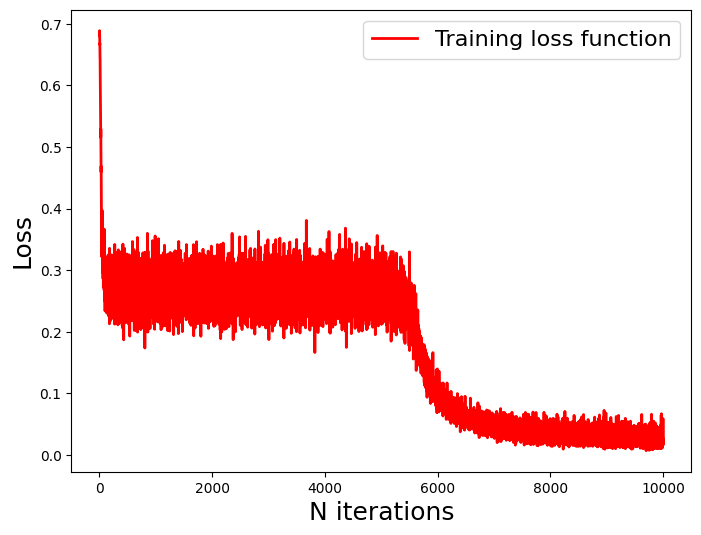

In [11]:
# Display loss evolution
fig, axes = plt.subplots(figsize=(8,6))
axes.plot(losses,'r-',lw=2,label='Training loss function')
axes.set_xlabel('N iterations',fontsize=18)
axes.set_ylabel('Loss',fontsize=18)
plt.legend(loc='upper right',fontsize=16)

## 6. Performance evaluation 

In [12]:
# Accuracy
def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - np.sum(np.abs(diff))/len(diff)

print("Accuracy")
# Evaluation
# train dataset
predicted_labels_train = model.predict(torch.from_numpy(features_train).type(torch.FloatTensor)).reshape(-1,1)
accuracy_prediction_train = accuracy(predicted_labels_train, labels_train)
print('Correct predictions (train dataset): %.3f' % accuracy_prediction_train)

# test dataset
predicted_labels_test = model.predict(torch.from_numpy(features_test).type(torch.FloatTensor)).reshape(-1,1)
accuracy_prediction_test = accuracy(predicted_labels_test, labels_test)
print('Correct predictions  (test dataset): %.3f' % accuracy_prediction_test)

Accuracy
Correct predictions (train dataset): 0.993
Correct predictions  (test dataset): 0.991


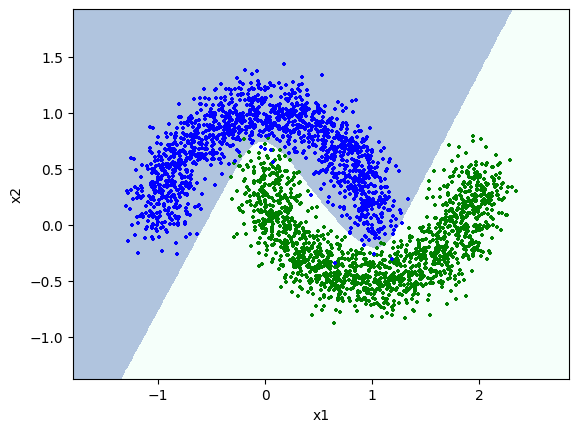

In [13]:
def plot_decision_boundary(pred_func,X,y,markers):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx,yy=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, levels=[0., 0.5, 1.], colors = ['lightsteelblue','mintcream'])
    pos = plt.scatter(X[:, 0][y[:,0]==1], X[:, 1][y[:,0]==1], c='g', marker = '+', s=10, label='Class 1')
    neg = plt.scatter(X[:, 0][y[:,0]==0], X[:, 1][y[:,0]==0], c='b', marker = '+', s=10, label='Class 2')
    plt.xlabel('x1')
    plt.ylabel('x2')


plot_decision_boundary(lambda x : model.predict(torch.from_numpy(x).type(torch.FloatTensor)), features_train, labels_train,'+')